In [ ]:
# Mount your Google drive folder on Colab
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


#Import the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import pipeline, preprocessing, metrics, model_selection, ensemble, linear_model
from sklearn_pandas import DataFrameMapper

In [2]:
%matplotlib inline

#Load the Dataset

In [3]:
url = '/content/gdrive/My Drive/vehicles2.csv'

#Read the Dataset with Pandas

In [4]:
df1 = pd.read_csv(url)

#Perform Exploratory Data Analysis on the Dataset

In [5]:
df1.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df1.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,state,lat,long
0,35990,2010.0,0,0,0,0,0,32742.0,0,0,0,0,32.5900,-85.4800
1,7500,2014.0,1,1,1,1,0,93600.0,0,1,1,0,32.5475,-85.4682
2,2000,1974.0,0,2,0,1,0,190000.0,0,1,0,0,32.8616,-85.2161
3,19500,2005.0,2,3,1,0,1,116000.0,1,1,2,0,32.5475,-85.4682
4,39990,2012.0,2,4,0,0,0,9692.0,0,0,0,0,32.5900,-85.4800


In [25]:
df1.describe()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,state,lat,long
count,122016.000000,122016.000000,122016.000000,122016.000000,122016.000000,122016.000000,122016.000000,1.220160e+05,122016.000000,122016.000000,122016.000000,122016.000000,122016.000000,122016.000000
mean,17315.351978,2010.992878,7.519661,1800.832735,0.888965,1.086054,0.141022,1.133290e+05,0.135728,0.964882,1.227052,23.739936,38.600242,-92.013904
std,12332.316438,7.964824,7.670557,2814.424262,1.064027,0.928852,0.505645,5.862931e+06,0.654109,0.390735,0.800154,14.933922,5.481794,17.032020
min,0.000000,1913.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-58.091220,-159.713745
25%,7995.000000,2008.000000,2.000000,142.000000,0.000000,0.000000,0.000000,4.300000e+04,0.000000,1.000000,1.000000,9.000000,35.025137,-98.611700
50%,13799.000000,2013.000000,5.000000,579.000000,1.000000,1.000000,0.000000,8.844800e+04,0.000000,1.000000,1.000000,23.000000,39.470000,-86.260000
75%,23998.250000,2016.000000,10.000000,1958.250000,1.000000,2.000000,0.000000,1.300235e+05,0.000000,1.000000,2.000000,37.000000,42.398900,-79.990000
max,345000.000000,2021.000000,41.000000,13886.000000,5.000000,7.000000,4.000000,2.043756e+09,5.000000,2.000000,2.000000,50.000000,64.993698,150.898969


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


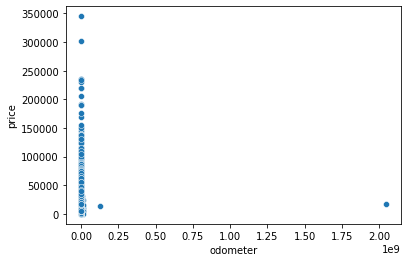

In [39]:
sns.scatterplot(df1['odometer'], df1['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


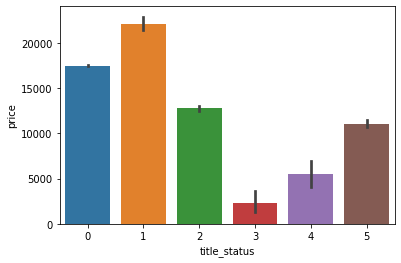

In [41]:
sns.barplot(df1['title_status'], df1['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


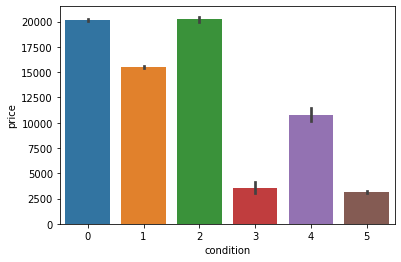

In [23]:
sns.barplot(df1['condition'], df1['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


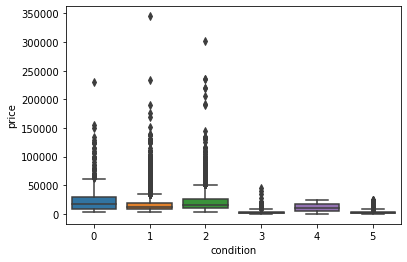

In [24]:
sns.boxplot(df1['condition'], df1['price'])

In [11]:
df1[(df1['condition'] == 4) & (df1['price'] > 25000)]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,state,lat,long
3939,45000,2006.0,6,46,4,2,1,47000.0,0,1,2,2,33.342500,-111.63530
5607,39600,2014.0,30,1755,4,2,0,6500.0,0,2,0,2,32.414200,-110.94660
6722,26000,2019.0,6,2140,4,2,0,27088.0,0,1,1,3,35.082000,-92.46800
7308,64499,2020.0,8,379,4,3,0,7700.0,0,1,0,4,35.386300,-119.17000
10203,55000,1967.0,0,2415,4,0,0,700.0,0,2,0,4,33.876600,-118.28350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154712,40635,2021.0,3,117,4,2,0,11.0,0,1,0,11,20.889410,-156.46774
154713,40888,2021.0,3,570,4,2,0,11.0,0,1,0,11,20.889410,-156.46774
155222,45000,2019.0,2,17,4,0,0,8000.0,1,1,0,18,30.415874,-94.17206
155794,29477,2016.0,0,3070,4,0,0,37600.0,0,1,2,23,44.882535,-93.46283


In [12]:
df1[(df1['year'] < 2000) & (df1['condition'] > 3)]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,state,lat,long
678,3200,1993.0,2,73,5,0,0,190000.0,0,1,0,0,31.340800,-85.842100
686,3000,1993.0,2,73,5,0,0,190000.0,0,1,0,0,31.340800,-85.842100
1027,1100,1997.0,9,61,5,1,0,259000.0,0,2,1,0,34.845197,-86.711998
1051,3100,1954.0,29,517,5,0,0,65000.0,4,2,0,0,34.667900,-86.560300
1322,2795,1997.0,8,469,5,2,0,300000.0,0,1,0,0,34.719000,-86.569000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156830,2400,1996.0,2,2176,5,0,0,235000.0,0,1,2,37,45.595900,-122.310400
156834,1200,1991.0,16,1816,5,1,0,227110.0,2,1,0,37,45.337700,-122.570000
156864,800,1997.0,10,69,5,2,0,89000.0,2,1,1,38,40.576750,-75.508110
156867,1200,1995.0,6,146,5,0,0,153000.0,0,2,2,38,40.040626,-75.393873


#Remove Outliers and Continue EDA Operations

In [13]:
outliers = list(df1[(df1['price'] > 500000)].index)

In [14]:
df1.drop(outliers, axis=0, inplace=True)

In [15]:
outliers = list(df1[(df1['price'] < 5000) & (df1['condition'] < 3) & (df1['odometer'] > 1000)].index)

In [16]:
df1.drop(outliers, axis=0, inplace=True)

In [17]:
outliers = list(df1[(df1['price'] > 25000) & (df1['condition'] > 3)].index)

In [18]:
df1.drop(outliers, axis=0, inplace=True)

In [19]:
outliers = list(df1[(df1['price'] > 1500000) & (df1['condition'] < 3)].index)

In [20]:
df1.drop(outliers, axis=0, inplace=True)

In [21]:
outliers = list(df1[(df1['price'] < 2500) & (df1['condition'] < 3)].index)

In [22]:
df1.drop(outliers, axis=0, inplace=True)

#Import SciKit Learn to Perform Train Test Split and Standardize the dataset

In [26]:
X = [ 'year', 'odometer', 'lat', 'long', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'state']

In [27]:
y = ['price']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1[X], df1[y], test_size=0.3, random_state=101)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df1[X], df1[y], test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Develop and Evaluate Various Models Using the Scikit Learn Machine Learning Algorithms

In [33]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()

random.fit(X_train, y_train)
random.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


array([15459.88      , 25324.97      , 14126.64      , ...,
        6342.35      ,  6056.15714286,  7712.91      ])

In [34]:
print("Training set score: {:.2f}".format(random.score(X_train, y_train)))
print("Test set score: {:.2f}".format(random.score(X_test, y_test)))

Training set score: 0.98
Test set score: 0.87


In [35]:
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(X_train, y_train)
ridge.predict(X_test)

array([[20636.28200325],
       [16602.86892445],
       [18442.20161767],
       ...,
       [11983.4874377 ],
       [14228.68009134],
       [17385.11527754]])

In [36]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.22
Test set score: 0.23


In [37]:
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso.fit(X_train, y_train)
lasso.predict(X_test)

array([20634.7807777 , 16602.04835848, 18445.45780163, ...,
       11987.08772528, 14231.89724877, 17384.1549624 ])

In [38]:
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.22
Test set score: 0.23


#Using SciKit Learn Pipeline

In [30]:
df = df1.sample(n=13000)

In [ ]:
mapper = DataFrameMapper([(['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'state'], preprocessing.StandardScaler()),([ 'year', 'odometer', 'lat', 'long'], preprocessing.OneHotEncoder())])

In [ ]:
pipeline_obj = pipeline.Pipeline([('mapper',mapper), ("model", linear_model.Ridge())])

In [ ]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'state',
       'lat', 'long'],
      dtype='object')

In [ ]:
pipeline_obj.fit(df[X],df[y])

Pipeline(memory=None,
         steps=[('mapper',
                 DataFrameMapper(default=False, df_out=False,
                                 features=[(['manufacturer', 'model',
                                             'condition', 'cylinders', 'fuel',
                                             'title_status', 'transmission',
                                             'drive', 'state'],
                                            StandardScaler(copy=True,
                                                           with_mean=True,
                                                           with_std=True)),
                                           (['year', 'odometer', 'lat', 'long'],
                                            OneHotEncoder(categories='auto',
                                                          drop=None,
                                                          dtype=<class 'numpy.float64'>,
                                                          hand

In [ ]:
print("Training set score: {:.2f}".format(pipeline_obj.score(X_train, y_train)))
print("Test set score: {:.2f}".format(pipeline_obj.score(X_test, y_test)))

Training set score: 0.92
Test set score: 0.93


#Using TensorFlow Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [ ]:

# creating a model for predicting deep learning model
model  = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(1,13)),
                tf.keras.layers.Dense(8, activation = 'relu'),
                tf.keras.layers.Dense(1, activation = 'relu')
])
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
50421/50421 [==============================] - 48s 961us/step - loss: 129709916553216.0000 - mean_squared_error: 129709916553216.0000 - val_loss: 172233968.0000 - val_mean_squared_error: 172233968.0000
Epoch 2/100
50421/50421 [==============================] - 49s 968us/step - loss: 129709304184832.0000 - mean_squared_error: 129709304184832.0000 - val_loss: 110520192.0000 - val_mean_squared_error: 110520192.0000
Epoch 3/100
50421/50421 [==============================] - 48s 955us/step - loss: 129709195132928.0000 - mean_squared_error: 129709195132928.0000 - val_loss: 105986592.0000 - val_mean_squared_error: 105986592.0000
Epoch 4/100
50421/50421 [==============================] - 48s 959us/step - loss: 129709354516480.0000 - mean_squared_error: 129709354516480.0000 - val_loss: 105001936.0000 - val_mean_squared_error: 105001936.0000
Epoch 5/100
50421/50421 [==============================] - 49s 981us/step - loss: 129709388070912.0000 - mean_squared_error: 129709388070912.000

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

10186604.30349402
695403.3195247415
